# Modelagem de ETo para Lavras utilizando Perceptron Multicamadas (PMC)

In [1]:
#Impotando bibliotecas
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
#Função Obter Dados
def obterDados(arquivo, linhaInicial, numeroDeLinhas):
    dados = pd.read_csv(arquivo, sep=";", header=0, skiprows=linhaInicial, nrows=numeroDeLinhas)
    dados = dados.values
    tMax = dados[:, 1]
    tMin = dados[:, 2]
    ur = dados[:, 3]
    insolacao = dados[:, 4]
    vento = dados[:, 5]
    ra = dados[:, 6]
    
    y = dados[:, 7]
    hs = dados[:, 8]
    
    tMaxLimpo =[]
    tMinLimpo=[]
    urLimpo=[]
    insolacaoLimpo=[]
    ventoLimpo=[]
    raLimpo=[]
    yLimpo=[]
    hsLimpo =[]
    

    for i in range(len(y)):
        if(not(tMax[i] > 38 or tMin[i] > 30 or ur[i] > 100)):
            tMaxLimpo.append(tMax[i])
            tMinLimpo.append(tMin[i])
            urLimpo.append(ur[i])
            insolacaoLimpo.append(insolacao[i])
            ventoLimpo.append(vento[i])
            raLimpo.append(ra[i])
            yLimpo.append(y[i])
            hsLimpo.append(hs[i])
        else:
            print("Outlier - linha " + str(i))
    
    inputs = []
    inputs.append(np.array(tMaxLimpo) / 40.0)
    inputs.append(np.array(tMinLimpo) / 30.0)
    #inputs.append(np.array(urLimpo) / 100.0)
    #inputs.append(np.array(insolacaoLimpo) / 16.0)
    #inputs.append(np.array(ventoLimpo) / 10.0)
    inputs.append(np.array(raLimpo) / 50.0)
    
    inputs = np.array(inputs)
    inputs = inputs.transpose()
    
    yLimpo = np.array(yLimpo) / 10.0
    yLimpo = yLimpo.transpose()
    
    hsLimpo = np.array(hsLimpo) / 10.0
    hsLimpo = hsLimpo.transpose()
    
    return inputs, yLimpo, hsLimpo
    

In [3]:
#Obtendo dados de treinamento e teste
arquivo = "dados_lavras.csv"
inputs_treino, y_treino, hs_treino = obterDados(arquivo, 0, 365)
inputs_teste, y_teste, hs_teste = obterDados(arquivo, 366, 365)


In [4]:
#Estrutura da rede
model = Sequential()
camada1 = Dense(units=10, activation="tanh", input_dim=3)
camada2 = Dense(units=1, activation="linear")

model.add(camada1)
model.add(camada2)

#Otimizador
#optimizer = optimizers.SGD(lr=0.005, momentum=0.9)
optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=optimizer, loss="mse")

#Treinamento
model.fit(inputs_treino, y_treino, epochs=10000, batch_size=300, verbose=0)



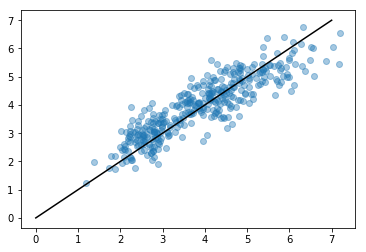

R2: 0.782490681123
EQM: 0.328639197416


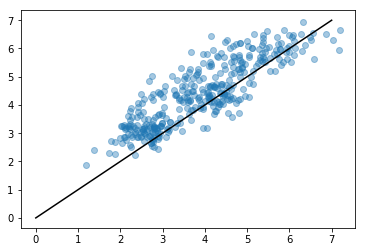

R2: 0.729949651593
EQM: 0.676233174601


In [5]:
#Predições
valPreditos = model.predict(inputs_teste)

#Plotando resultados para a Rede neural
plt.scatter(y_teste*10, valPreditos*10, alpha=0.4)
plt.plot([0,7], [0,7], color="black")
plt.savefig("gráfico 1", dpi=300)  #Comando para salvar a imagem na pasta de trabalho
plt.show()

#Alguns índices estatísticos para a Rede neural
r = np.corrcoef(y_teste, valPreditos[:,0])
print("R2: " + str(r[0,1]**2))
eqm = sum(((valPreditos[:,0]*10) - (y_teste*10))**2)/len(y_teste)
print("EQM: " + str(eqm))


#Plotando resultados para a Equação de Hargreaves-Samanai
plt.scatter(y_teste*10, hs_teste*10, alpha=0.4)
plt.plot([0,7], [0,7], color="black")
plt.show()

#Alguns índices estatísticos para a Equação de Hargreaves-Samanai
r = np.corrcoef(y_teste, hs_teste)
print("R2: " + str(r[0,1]**2))
eqm = sum(((hs_teste*10) - (y_teste*10))**2)/len(y_teste)
print("EQM: " + str(eqm))


In [6]:
#Obtendo os pesos da rede treinada
pesos = model.get_weights()
pesos

[array([[-0.92606705,  0.06626308, -0.80689013, -0.21063575, -0.0512904 ,
          0.58897555, -0.70802563,  0.41685674, -0.75312203,  0.07977891],
        [ 0.42466888, -0.22720043,  0.31369719,  0.07165662,  0.53691798,
         -1.34827626,  0.68754798,  0.18041575,  0.13906653, -0.87514734],
        [ 0.2146814 , -0.53148228, -0.84331524, -0.14713857,  0.07951334,
         -1.01455724,  1.15592968, -0.55403799,  0.25425467,  0.40981802]], dtype=float32),
 array([ 0.08064914,  0.00812716, -0.05242465, -0.0101557 , -0.00793203,
         0.09845117,  0.13373403, -0.00434407,  0.20268229, -0.17670257], dtype=float32),
 array([[-0.95361948],
        [-0.40657738],
        [ 0.41415361],
        [ 0.03724803],
        [ 0.0082673 ],
        [-0.83359611],
        [ 0.41886318],
        [ 0.75204247],
        [-0.606062  ],
        [ 1.41303957]], dtype=float32),
 array([-0.11235777], dtype=float32)]